In [77]:
#This code explore the NBA players from the 2013-2014 basketball season and it uses a Machin learning algorithm called
#K-Means clusters to group the players in clusters. in doing this shows which player are most similar in statistics

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [78]:
#Load data from github csv file
urlfile = "https://raw.githubusercontent.com/Yorko/mlcourse.ai/master/data/nba_2013.csv"
mydata = pd.read_csv(urlfile)

In [79]:
mydata.head()

,player,pos,age,bref_team_id,g,gs,mp,fg,fga,fg.,...,drb,trb,ast,stl,blk,tov,pf,pts,season,season_end
0,Quincy Acy,SF,23,TOT,63,0,847,66,141,0.468,...,144,216,28,23,26,30,122,171,2013-2014,2013
1,Steven Adams,C,20,OKC,81,20,1197,93,185,0.503,...,190,332,43,40,57,71,203,265,2013-2014,2013
2,Jeff Adrien,PF,27,TOT,53,12,961,143,275,0.520,...,204,306,38,24,36,39,108,362,2013-2014,2013
3,Arron Afflalo,SG,28,ORL,73,73,2552,464,1011,0.459,...,230,262,248,35,3,146,136,1330,2013-2014,2013
4,Alexis Ajinca,C,25,NOP,56,30,951,136,249,0.546,...,183,277,40,23,46,63,187,328,2013-2014,2013


In [80]:
#get the number of rows and columns in our dataset
#481 rows of players and 31 columns of stats
mydata.shape

(481, 31)

In [81]:
#Find the average value for each numeric column
#x3p. is 3 point percetage average which is about 29%
mydata.mean()

age             26.509356
g               53.253638
gs              25.571726
mp            1237.386694
fg             192.881497
fga            424.463617
fg.              0.436436
x3p             39.613306
x3pa           110.130977
x3p.             0.285111
x2p            153.268191
x2pa           314.332640
x2p.             0.466947
efg.             0.480752
ft              91.205821
fta            120.642412
ft.              0.722419
orb             55.810811
drb            162.817048
trb            218.627859
ast            112.536383
stl             39.280665
blk             24.103950
tov             71.862786
pf             105.869023
pts            516.582121
season_end    2013.000000
dtype: float64

In [82]:
#Get the mean of a specific column
mydata.loc[:, 'fg'].mean()

192.88149688149687

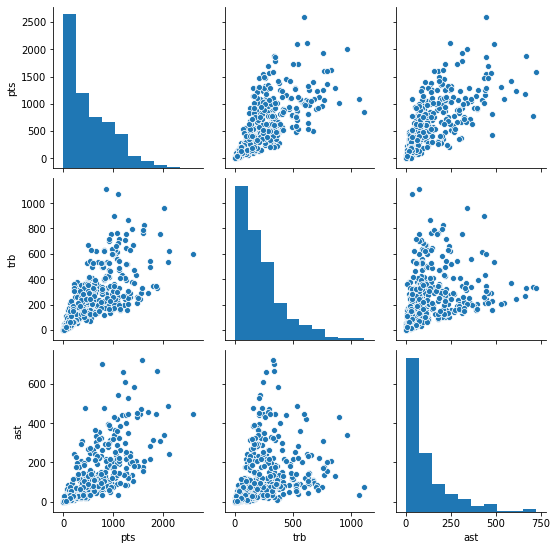

In [83]:
#Make a pairwise scatter plot exploring the data set
sns.pairplot(mydata[['pts', 'trb', 'ast']])

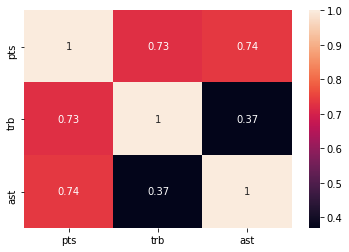

In [84]:
#Make a heatmap to see correlation more clearly
#This informs a correlation between the 3 major stats used to define a basketball player
#example there is a 73% or 0.73 correlation between points and total rebounds
correlation= mydata[['pts', 'trb', 'ast']].corr()
sns.heatmap(correlation, annot=True)

In [85]:
#Make a cluster of NBA players using K Means which is a Machine Learning algorithm
kmeansModel = KMeans(n_clusters = 5, random_state=1)
#Remove columns with missing values to keep data clean
cleanColumns = mydata._get_numeric_data().dropna(axis=1)

In [86]:
#Train Model
kmeansModel.fit(cleanColumns)
#get labels for each cluster
# labels 0-4 reprsent a NBA player
labels = kmeansModel.labels_
labels

array([0, 0, 0, 1, 0, 3, 1, 0, 2, 2, 4, 3, 2, 2, 4, 0, 2, 1, 3, 0, 4, 3,
       0, 0, 4, 3, 0, 3, 3, 3, 2, 2, 4, 2, 3, 4, 2, 1, 2, 3, 0, 1, 0, 4,
       0, 2, 3, 3, 0, 2, 2, 2, 2, 3, 3, 2, 0, 2, 4, 1, 4, 2, 4, 3, 2, 3,
       3, 3, 3, 0, 3, 4, 4, 2, 4, 3, 3, 0, 0, 0, 4, 2, 3, 4, 4, 1, 2, 4,
       2, 4, 3, 3, 0, 3, 3, 2, 3, 4, 2, 1, 3, 1, 3, 3, 4, 4, 0, 2, 3, 3,
       1, 2, 3, 3, 3, 1, 0, 2, 3, 3, 3, 0, 4, 1, 4, 0, 0, 0, 1, 1, 2, 4,
       4, 1, 3, 3, 1, 3, 0, 0, 4, 4, 0, 3, 4, 3, 4, 3, 2, 2, 4, 3, 3, 0,
       4, 0, 0, 0, 4, 4, 1, 0, 1, 4, 2, 3, 3, 3, 3, 3, 4, 1, 0, 3, 2, 2,
       4, 1, 0, 1, 3, 0, 3, 0, 2, 1, 2, 3, 3, 0, 3, 3, 3, 4, 0, 4, 0, 1,
       4, 0, 4, 4, 4, 2, 4, 2, 3, 4, 0, 3, 3, 0, 1, 0, 2, 1, 2, 2, 1, 3,
       4, 4, 3, 3, 3, 1, 3, 3, 3, 1, 4, 3, 1, 0, 4, 0, 0, 1, 3, 4, 3, 3,
       0, 3, 4, 4, 0, 0, 4, 3, 2, 2, 0, 1, 4, 2, 3, 3, 0, 2, 3, 3, 4, 3,
       4, 1, 3, 4, 3, 0, 0, 3, 1, 4, 2, 0, 4, 1, 1, 3, 2, 0, 4, 2, 0, 0,
       4, 3, 1, 3, 3, 2, 0, 0, 3, 3, 4, 4, 4, 3, 4,

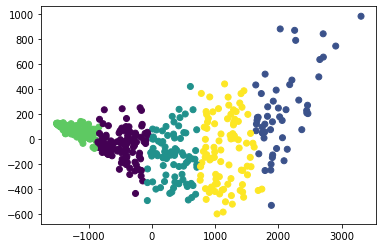

In [87]:
#Plot players by cluster
#2 Dimensions of the cluster
pca2 = PCA(2)
plotColumns = pca2.fit_transform(cleanColumns)
plotColumns
#Display this data as a scatter plot
#The data separates the scatter plot in clusters by color code from 0-4 where 0 is the left most and 4 is the right most
plt.scatter(x=plotColumns[:,0], y=plotColumns[:,1], c=labels)

In [88]:
#Get stats on specific NBA players using cleanColumns to remove any stats with no data in it
player1 = cleanColumns.loc[mydata['player'] == 'Kobe Bryant', :]
player2 = cleanColumns.loc[mydata['player']== 'Stephen Curry', :]
print(player1)
print(player2)

    age  g  gs   mp  fg  fga  x3p  x3pa  x2p  x2pa  ...  orb  drb  trb  ast  \
68   35  6   6  177  31   73    3    16   28    57  ...    2   24   26   38   

    stl  blk  tov  pf  pts  season_end  
68    7    1   34   9   83        2013  

[1 rows x 22 columns]
     age   g  gs    mp   fg   fga  x3p  x3pa  x2p  x2pa  ...  orb  drb  trb  \
110   25  78  78  2846  652  1383  261   615  391   768  ...   46  288  334   

     ast  stl  blk  tov   pf   pts  season_end  
110  666  128   14  294  194  1873        2013  

[1 rows x 22 columns]


In [89]:
#Make prediction using K Means Model
player1List = player1.values.tolist()
player2List = player2.values.tolist()

#Use K Means model to predict which player belongs to which cluster
player1Cluster = kmeansModel.predict(player1List) #cluster 3
player2Cluster = kmeansModel.predict(player2List) #cluster 1

#print the cluster
print(player1Cluster)
print(player2Cluster)

[3]
[1]


In [90]:
#Look at all common correlations
mydata.corr()

,age,g,gs,mp,fg,fga,fg.,x3p,x3pa,x3p.,...,orb,drb,trb,ast,stl,blk,tov,pf,pts,season_end
age,1.000000,-0.012074,0.025163,0.007961,-0.009749,-0.018304,0.025221,0.050611,0.028850,0.014235,...,-0.068726,0.010822,-0.013451,0.019216,-0.028315,-0.017398,-0.030789,-0.028221,-0.011910,NaN
g,-0.012074,1.000000,0.610951,0.864487,0.739993,0.746963,0.322201,0.518074,0.537011,0.103762,...,0.546902,0.707389,0.682688,0.551128,0.709650,0.475581,0.713508,0.865797,0.728462,NaN
gs,0.025163,0.610951,1.000000,0.860036,0.821619,0.811531,0.234677,0.501808,0.515718,0.063468,...,0.560067,0.774892,0.735738,0.636059,0.743178,0.505589,0.767107,0.725573,0.810294,NaN
mp,0.007961,0.864487,0.860036,1.000000,0.931120,0.936883,0.273682,0.645056,0.666126,0.138230,...,0.576844,0.821145,0.774492,0.733041,0.852331,0.506254,0.885406,0.884484,0.927464,NaN
fg,-0.009749,0.739993,0.821619,0.931120,1.000000,0.988262,0.278007,0.597239,0.613988,0.110514,...,0.562293,0.820259,0.769339,0.708228,0.786597,0.484208,0.903383,0.798769,0.992041,NaN
fga,-0.018304,0.746963,0.811531,0.936883,0.988262,1.000000,0.211174,0.662004,0.685535,0.152111,...,0.487154,0.771821,0.710910,0.748141,0.803290,0.412738,0.910689,0.786560,0.989211,NaN
fg.,0.025221,0.322201,0.234677,0.273682,0.278007,0.211174,1.000000,-0.025510,-0.041720,-0.039424,...,0.423358,0.377067,0.404832,0.068105,0.185385,0.401431,0.221846,0.359125,0.248276,NaN
x3p,0.050611,0.518074,0.501808,0.645056,0.597239,0.662004,-0.025510,1.000000,0.991700,0.462709,...,-0.065822,0.280171,0.182848,0.617553,0.592092,-0.043707,0.560520,0.446711,0.655342,NaN
x3pa,0.028850,0.537011,0.515718,0.666126,0.613988,0.685535,-0.041720,0.991700,1.000000,0.449886,...,-0.058075,0.291838,0.193712,0.643211,0.622973,-0.040987,0.589799,0.463455,0.672076,NaN
x3p.,0.014235,0.103762,0.063468,0.138230,0.110514,0.152111,-0.039424,0.462709,0.449886,1.000000,...,-0.314490,-0.094895,-0.166848,0.212819,0.150476,-0.187411,0.097876,-0.019089,0.144431,NaN


In [91]:
#Predict number of points made per player are from assists
#Points are independent variable and assist are dependent variable (target)
#Split the data 20% testing and 80% training
Xtrain, Xtest, Ytrain, Ytest = train_test_split(mydata[['pts']], mydata[['ast']], test_size=0.2, random_state=3)

In [93]:
#Create Linear Regression Model
lr = LinearRegression()
#Train our linear regression model
lr.fit(Xtrain, Ytrain)
#Make prediction on testing data
predictions = lr.predict(Xtest)
#Print predictions
print(predictions)
#Print actual values
print(Ytest)

[[ 11.04390061]
 [194.81952913]
 [ 19.72454666]
 [ 98.48553031]
 [262.35918984]
 [180.210637  ]
 [ 10.19700831]
 [138.07774521]
 [181.26925237]
 [183.80992926]
 [ 91.922115  ]
 [  7.65633142]
 [229.33039024]
 [ 54.0236847 ]
 [ 27.34657733]
 [115.21165318]
 [ 73.07876139]
 [205.19395977]
 [ 36.87411568]
 [149.7225143 ]
 [114.36476088]
 [177.88168318]
 [ 69.47946913]
 [ 23.74728507]
 [166.02519102]
 [ 21.8417774 ]
 [365.25660396]
 [114.57648396]
 [110.34202247]
 [220.6497442 ]
 [157.9797142 ]
 [ 91.71039193]
 [117.540607  ]
 [177.88168318]
 [343.87257346]
 [348.10703494]
 [105.89583791]
 [131.72605298]
 [147.1818374 ]
 [143.15909899]
 [ 29.04036193]
 [  6.38599298]
 [ 46.40165402]
 [ 94.67451497]
 [296.87005095]
 [  7.65633142]
 [ 29.67553115]
 [ 15.70180825]
 [138.50119136]
 [130.66743761]
 [158.82660649]
 [ 98.69725338]
 [209.85186741]
 [202.22983673]
 [ 13.37285443]
 [ 79.00700747]
 [ 48.73060784]
 [332.86297359]
 [  7.65633142]
 [ 19.93626973]
 [ 43.22580791]
 [ 12.52596213]
 [179.99

In [95]:
#Test our model: Score returns the coefficient of determination R^2 of the prediction
lrConfidence = lr.score(Xtest, Ytest)
print(lrConfidence)
#Result shows weak correlation that about 0.512 of the time number or pointer per player are from assists

0.5117147754177294
